In [7]:
os.environ["PUBLIC_BI_BENCHMARK"] = "D:\\semantic_data_lake\\semantic_data_lake\\data\\benchmark\\"
from data_loader.utils import load_public_bi_table, get_all_publicbi_tables
from maths.statistics import cummulative_distribution_function, inverse_transform_sampling
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wasserstein_distance
from maths.ranking_metrics import mean_reciprocal_rank, MRR


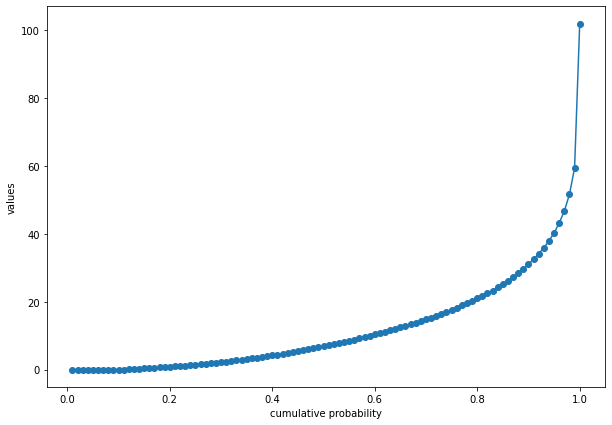

In [30]:
data = load_public_bi_table("MLB", "MLB_1", 1)["H"].tolist()

x, icdf = inverse_transform_sampling(data, 100)

plt.figure(figsize=(10,7))
plt.ylabel("values")
plt.xlabel("cumulative probability")
plt.plot(x, icdf, marker="o")

In [12]:
data_1 = load_public_bi_table("MLB", "MLB_1", 1)["H"].tolist()
data_2 = load_public_bi_table("MLB", "MLB_15", 1)["H"].tolist()

x, icdf_1 = inverse_transform_sampling(data_1, 1000)
x, icdf_2 = inverse_transform_sampling(data_2, 1000)

In [13]:
print(wasserstein_distance(data_1, data_2))

6.969837509194987


In [14]:
print(wasserstein_distance(icdf_1, icdf_2))

6.992106964558327


# MRR Example

In [19]:
ranked_labels = np.array([["H", "X1B", "X2B"], ["X1B", "H", "X2B"], ["BB", "X2B", "H"]])


In [20]:
MRR("H", ranked_labels)

0.611111111111111